<a href="https://colab.research.google.com/github/RoyPoulami/X-axis-parameter-generation-Neurokit/blob/main/X_axis_parameters_v1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

!mkdir -p ~/.google/carditek-ecg
!cp /content/drive/MyDrive/Colaboratory/dot-google/client_secret.json ~/.google/carditek-ecg

%cd /content/drive/MyDrive/Colaboratory/dot-google/python-client-master/carditek/cloud/client
import buffer
import client 

client = client.Client()

workspace ='/content/drive/My Drive/Colaboratory/Carditek TIFF Files/CAL_PULSE/'
background = '/content/drive/My Drive/Colaboratory/Carditek TIFF Files'
import sys; sys.path.append(workspace)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1q0cNRCNl-FiQ1sdRz_H4Qa7dtYD-81-B/Colaboratory/dot-google/python-client-master/carditek/cloud/client


In [ ]:
!pip install neurokit2
from google.colab import files
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
import scipy as sp
from scipy import signal
from scipy import signal as sp
from PIL import Image, ImageDraw, ImageFont
from scipy.signal import medfilt,lfilter,butter,filtfilt,spectrogram,periodogram,welch
import os
# Load NeuroKit and other useful packages
import neurokit2 as nk
import seaborn as sns
import statistics as st
%matplotlib inline
import collections
import math
from math import nan

##SETTING UP FILTER 
def ecg_filters(lead_data):
  d, c = sp.butter(3, [45/500] , btype='low', analog=False)
  #d = signal.firwin(511, cutoff = [150/500], window = "hamming", pass_zero=True); a = 1
  b = signal.firwin(1735, cutoff = [0.8/500], window = "hamming", pass_zero=False); a = 1
  #b, a = sp.butter(5, [0.5/500] , btype='high', analog=False)
  filt_BW = sp.filtfilt(b, a, lead_data)
  filt_45 = sp.lfilter(d, c, filt_BW)
  return filt_45

def ecg_filters_Smooth_filter(lead_data):
  d, c = sp.signal.butter(3, [25/500] , btype='low', analog=False)
  b = signal.firwin(1735, cutoff = [1/500], window = "hamming", pass_zero=False); a = 1
  f, e = signal.iirnotch(50, 10, 1000)
  filt_BW = sp.signal.filtfilt(b, a, lead_data)*(0.000286)
  filt_50 = sp.signal.lfilter(f, e, filt_BW)
  filt_45 = sp.signal.lfilter(d, c, filt_50)#*(0.000286)
  return filt_45 
#function for data dictonary 
def Value_axis(data_dict,value):
  data=list(data_dict.items())
  an_array=np.array(data)
  Values_1=an_array[value]
  Values_2=np.asarray(Values_1[1])
  return Values_2

# Function for average interval calculation by neglecting nan elements 
def avg_intervalcalculation(start_pt,stop_pt):
  count=0;interval_average=0
  for d in range(0,min(len(start_pt),len(stop_pt))):
    if np.isnan(start_pt[d])!=True and np.isnan(stop_pt[d])!=True:
      interval_average=interval_average+(stop_pt[d]-start_pt[d])
      count=count+1
  interval_average=interval_average/count
  return(interval_average)

# Function for average internal calculation by neglecting extra element 
# def data_calculation(st_p,en_p):
#   count=0;duration_avg=0
#   for p in range(0,len(st_p)):
#     if np.isnan(st_p[p])==False and np.isnan(en_p[p])==False:
#       duration_avg=duration_avg+(en_p[p]-st_p[p])
#       count=count=1
#   duration_avg=duration_avg/count
#   return(duration_avg)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 30.4 MB/s 


In [ ]:
# Retrieve ECG data from data folder (sampling rate= 1000 Hz)
#ecg_signal = nk.data(dataset="ecg_3000hz")['ECG']
# Extract R-peaks locations
Fs=1000
##################################
trialId = '1'
name = ' cal05000'
ts =1641367065 
# macId = 'E4:E1:12:C4:CD:E1'
# macId = 'E4:E1:12:C4:CD:F0'
macId = '24:9F:89:20:18:3E'
# macId = 'E4:E1:12:C4:CD:DE'
# macId = '24:9F:89:20:18:4A'
# macId ='E4:E1:12:C4:CD:90'
#macId='E4:E1:12:C4:CD:B6'

#####################################

ECG_Type = "12 Lead ECG"
#Patient_Details = ("Trial ID :  %s \nName :  %s  \nTimestamp :  %d  \nMAC :  %s"%(trialId,name,ts,macId))
Patient_Details = ("Trial ID :  %s \nTimestamp :  %d  \nMAC :  %s"%(trialId,ts,macId))
#MAC_and_TS = (str(MacID)+'/'+str(Timestamp))
file_name = str(trialId)
start = 3000

#buffer = client.fetch(str(macId),int(Timestamp[0]))
buffer = client.fetch(macId,ts)
frame = buffer.frame

Leadi= frame.i
Leadii=frame.ii
V1=frame.v1
V2=frame.v2
V3=frame.v3
V4=frame.v4
V5=frame.v5
V6=frame.v6

i =  Leadi*0.000286
ii= Leadii*0.000286
ecg_signal =  V1*0.000286
ecg_signal =  V2*0.000286
ecg_signal =  V3*0.000286
ecg_signal =  V4*0.000286
ecg_signal =  V5*0.000286
ecg_signal =  V6*0.000286

ecg_signal = ecg_filters(V6)
# ecg_signal=ecg_filters_Smooth_filter(V2)
# ecg_signal= ecg_filters(ii)
#ii = ecg_filters(Lead2)
plt.rcParams['figure.figsize'] = [8, 5]  # Bigger images

In [ ]:
def Rhythm_Check(lead_data):
  b = signal.firwin(1735, cutoff = [3/500], window = "hamming", pass_zero=False); a = 1 ;  filt_BW = sp.filtfilt(b, a, lead_data)
  d, c = sp.butter(15, [35/500] , btype='low', analog=False); filtered = sp.lfilter(d, c, filt_BW);filtered = filtered*filtered;
  peaks,rpeak = sp.find_peaks(filtered,distance = 400,height=(max(filtered[1000:5000])/4))
  RR_int = []
  for j in range (0,len(peaks)-1):
    diff = (peaks[j+1]) - (peaks[j])
    RR_int.append(diff)
  st_dev = np.std(RR_int)
  # print(st_dev)  ### standard deviation checking
  # plt.figure(figsize=(33.0,5.5))
  # plt.plot(lead_data)
  # plt.plot(peaks,lead_data[peaks],'o')    #  #  #  #  # to check the marking of QRS
  # if (st_dev<120 and st_dev>2):
  if (st_dev<120):
    print('Regular Rhythm')
    # plt.title('Regular Rhythm',fontsize=25)
  else:
    print('Irregular Rhythm')
  #   plt.title('Irregular Rhythm',fontsize=25)
  # plt.xlim([0,15000]);
  # plt.xticks(np.arange(0, len(lead_data), step=(len(lead_data)/75)));plt.grid()

Rhythm_Check(Leadii)




Regular Rhythm


# ***Heart rate checking***

In [ ]:
# Heart Rate#


peaks, info = nk.ecg_peaks(ecg_signal, sampling_rate=Fs)
R_peak=peaks.ECG_R_Peaks; peak=[]
for k in range(len(R_peak)):
    peak.append(R_peak[k])
df = pd.DataFrame.from_dict(info); #print(df)
peaklocations = df.ECG_R_Peaks; IntRR=np.empty(len(peaklocations)-1)
for i in range(1,len(peaklocations)):
    ch = peaklocations[i]-peaklocations[i-1]
    if ch<2000: IntRR[i-1] = ch;
for j in range(0,len(IntRR)-1):
    if IntRR[j]<=500: IntRR[j]=st.mean([IntRR[j-1],IntRR[j+1]])
avg_RR = np.mean(IntRR); print('AVG RR:',int(avg_RR))
HeartRate = (60*Fs)/avg_RR; print("HR:",int(HeartRate))

 


AVG RR: 1002
HR: 59


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  del sys.path[0]


[['ECG_P_Onsets'
  list([1794, 2802, 3799, 4802, 5804, 6807, 7809, 8812, 9814, 10818, 11817, 12821, 13823])]
 ['ECG_P_Peaks'
  list([1848, 2846, 3856, 4852, 5854, 6856, 7861, 8860, 9868, 10867, 11859, 12870, 13870])]
 ['ECG_P_Offsets'
  list([1884, 2891, 3895, 4890, 5895, 6895, 7900, 8900, 9902, 10908, 11911, 12909, 13911])]
 ['ECG_Q_Peaks'
  list([911, 1952, 2910, 3913, 4914, 5938, 6916, 7951, 8963, 9966, 10977, 11933, 12971, 13966])]
 ['ECG_R_Onsets'
  list([957, 1931, 2942, 3950, 4955, 5953, 6936, 7940, 8974, 9952, 10959, 11953, 12948, 13986])]
 ['ECG_R_Offsets'
  list([1068, 2070, 3072, 4074, 5076, 6078, 7079, 8084, 9086, 10089, 11090, 12092, 13094, 14096])]
 ['ECG_S_Peaks'
  list([1036, 2037, 3039, 4040, 5042, 6044, 7047, 8051, 9053, 10055, 11058, 12058, 13061, 14063])]
 ['ECG_T_Onsets'
  list([1177, 2173, 3180, 4181, 5182, 6178, 7187, 8188, 9183, 10193, 11194, 12206, 13196])]
 ['ECG_T_Peaks'
  list([1261, 2273, 3251, 4281, 5271, 6259, 7271, 8276, 9283, 10293, 11278, 12306, 13276]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[['ECG_P_Onsets'
  list([1794, 2802, 3799, 4802, 5804, 6807, 7809, 8812, 9814, 10818, 11817, 12821, 13823])]
 ['ECG_P_Peaks'
  list([1848, 2846, 3856, 4852, 5854, 6856, 7861, 8860, 9868, 10867, 11859, 12870, 13870])]
 ['ECG_P_Offsets'
  list([1884, 2891, 3895, 4890, 5895, 6895, 7900, 8900, 9902, 10908, 11911, 12909, 13911])]
 ['ECG_Q_Peaks'
  list([911, 1952, 2910, 3913, 4914, 5938, 6916, 7951, 8963, 9966, 10977, 11933, 12971, 13966])]
 ['ECG_R_Onsets'
  list([957, 1931, 2942, 3950, 4955, 5953, 6936, 7940, 8974, 9952, 10959, 11953, 12948, 13986])]
 ['ECG_R_Offsets'
  list([1068, 2070, 3072, 4074, 5076, 6078, 7079, 8084, 9086, 10089, 11090, 12092, 13094, 14096])]
 ['ECG_S_Peaks'
  list([1036, 2037, 3039, 4040, 5042, 6044, 7047, 8051, 9053, 10055, 11058, 12058, 13061, 14063])]
 ['ECG_T_Onsets'
  list([1177, 2173, 3180, 4181, 5182, 6178, 7187, 8188, 9183, 10193, 11194, 12206, 13196])]
 ['ECG_T_Peaks'
  list([1261, 2273, 3251, 4281, 5271, 6259, 7271, 8276, 9283, 10293, 11278, 12306, 13276]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


T_Off [13362]
QRS duration 129
PR_duration 112
QT duration 417
QTc interval 416


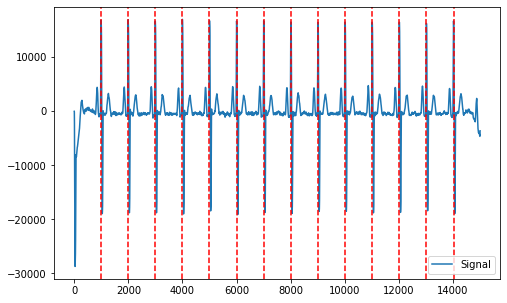

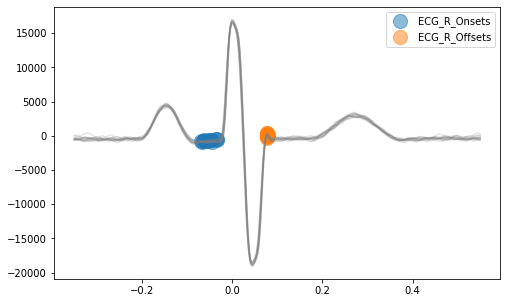

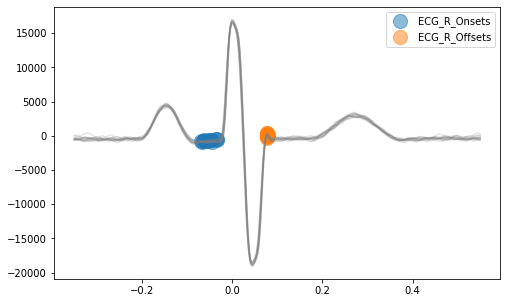

In [ ]:
_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=Fs)

# VISUZLIZE R-PEAKS IN ECG SIGNAL
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], ecg_signal)

# ZOOMING INTO FIRST 5 R-PEAKS
# plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:5], ecg_signal[:20000])

# Visualize R-waves boundaries

signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=Fs, method="cwt", show=True, show_type='bounds_R')
data = list(waves_cwt.items())
an_array = np.array(data)
print(an_array)
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=Fs, method="cwt", show=True, show_type='bounds_R')
data1 = list(waves_dwt.items())
an_array1 = np.array(data)
print(an_array1)
# RR INTERVAL CALCULATIONS
df = pd.DataFrame.from_dict(rpeaks); #print(df)
peaklocation=df.ECG_R_Peaks
RR_interval=np.zeros(len(peaklocation)-1)
for i in range(1,len(peaklocation)):
  ch = peaklocation[i]-peaklocation[i-1]
  if ch<2000: RR_interval[i-1]=ch;
  for j in range (0,len(RR_interval)-1):
    if RR_interval[j]<=500:RR_interval[j]=np.mean([RR_interval[j-1],RR_interval[j+1]])
  avg_RR_interval=np.average(RR_interval)
  HeartRate=(60*Fs)/avg_RR_interval;
print("avg_RR_interval",avg_RR_interval)


# df = pd.DataFrame.from_dict(rpeaks); #print(df)
# peaklocation=df.ECG_R_Peaks
# RR_interval=[]
# for i in range(1,len(peaklocation)):
#   ch = peaklocation[i]-peaklocation[i-1]
#   if ch>=300 and ch<=2000:
#     RR_interval=int(ch)
# print(RR_interval)

signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=Fs, method="cwt")
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=Fs, method="dwt")

P_Onset=Value_axis(waves_dwt,1)
R_Onset=Value_axis(waves_dwt,4)
QRS_Offset=Value_axis(waves_cwt,5)
QRS_Onset=Value_axis(waves_cwt,4)
T_Offset=Value_axis(waves_cwt,9)
T_Peaks=Value_axis(waves_cwt,8)


QRS_interval=avg_intervalcalculation(QRS_Onset,QRS_Offset)
PR_interval=avg_intervalcalculation(P_Onset,R_Onset)
QT_interval=avg_intervalcalculation(QRS_Onset,T_Offset)
# if QT_interval<300:
T_Off = []
for i in range(len(T_Peaks)):
    st_p=T_Peaks[i]
    #print(st_p)
    en_p=T_Peaks[i]+200
    counter=0
for j in range(st_p,en_p):
      counter=counter+1
      if(ecg_signal[j]<0):
        #counter=counter+1
        T_Off.append(st_p+counter)
        #print(counter)
        break
print("T_Off",T_Off)
# QT_interval=avg_intervalcalculation(QRS_Onset,T_Off)

print('QRS duration',int(QRS_interval))
print('PR_duration',int(PR_interval))
print('QT duration',int(QT_interval))
QTc=(QT_interval+1.75*(HeartRate-60))
print("QTc interval",int(QTc))
